In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings

In [2]:
df = pd.read_parquet('reviews_con_categoria.parquet')

Verificamos la informacion de las columnas para ver que tipo de datos son

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2440779 entries, 0 to 3549536
Data columns (total 20 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user_id           float64       
 1   name_x            object        
 2   time              datetime64[ns]
 3   rating            int64         
 4   text              object        
 5   resp              object        
 6   gmap_id           object        
 7   name_y            object        
 8   address           object        
 9   description       object        
 10  latitude          float64       
 11  longitude         float64       
 12  category          object        
 13  avg_rating        float64       
 14  num_of_reviews    int64         
 15  hours             object        
 16  MISC              object        
 17  state             object        
 18  relative_results  object        
 19  url               object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(

In [4]:
df

,user_id,name_x,time,rating,text,resp,gmap_id,name_y,address,description,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,state,relative_results,url
0,1.089912e+20,Song Ro,2021-01-06 05:12:07,5,Love there korean rice cake.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",None,34.058092,-118.292130,Korean restaurant,4.4,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
1,1.089912e+20,Song Ro,2021-01-06 05:12:07,5,Love there korean rice cake.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",None,34.058092,-118.292130,Korean restaurant,4.4,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,1.112903e+20,Rafa Robles,2021-02-09 05:47:28,5,Good very good,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",None,34.058092,-118.292130,Korean restaurant,4.4,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,1.112903e+20,Rafa Robles,2021-02-09 05:47:28,5,Good very good,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",None,34.058092,-118.292130,Korean restaurant,4.4,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,1.126404e+20,David Han,2020-03-08 05:04:42,4,They make Korean traditional food very properly.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",None,34.058092,-118.292130,Korean restaurant,4.4,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549532,1.070913e+20,Christopher James,2018-08-13 02:15:08,5,None,None,0x865d6d83a68a9f49:0x3a37ce6666f5333e,74 Ranch Resort,"74 Ranch Resort, 12200 Farm 791, Campbellton, ...",None,28.677744,-98.373761,Resort hotel,5.0,28,None,None,None,"[0x865e178b00f484bd:0xaa2a4de6e6272c46, 0x8667...",https://www.google.com/maps/place//data=!4m2!3...
3549533,1.049097e+20,Thomas Provost,2019-06-16 22:51:22,5,None,None,0x865d6d83a68a9f49:0x3a37ce6666f5333e,74 Ranch Resort,"74 Ranch Resort, 12200 Farm 791, Campbellton, ...",None,28.677744,-98.373761,Resort hotel,5.0,28,None,None,None,"[0x865e178b00f484bd:0xaa2a4de6e6272c46, 0x8667...",https://www.google.com/maps/place//data=!4m2!3...
3549534,1.036377e+20,Rhett Fuller,2016-01-21 04:03:09,5,None,None,0x865d6d83a68a9f49:0x3a37ce6666f5333e,74 Ranch Resort,"74 Ranch Resort, 12200 Farm 791, Campbellton, ...",None,28.677744,-98.373761,Resort hotel,5.0,28,None,None,None,"[0x865e178b00f484bd:0xaa2a4de6e6272c46, 0x8667...",https://www.google.com/maps/place//data=!4m2!3...
3549535,1.103052e+20,Nathan Merecka,2019-12-03 20:24:52,5,None,None,0x865d6d83a68a9f49:0x3a37ce6666f5333e,74 Ranch Resort,"74 Ranch Resort, 12200 Farm 791, Campbellton, ...",None,28.677744,-98.373761,Resort hotel,5.0,28,None,None,None,"[0x865e178b00f484bd:0xaa2a4de6e6272c46, 0x8667...",https://www.google.com/maps/place//data=!4m2!3...


Necesito crear una columna con los Estados de EEUU

In [5]:
def obtener_estado(address):
    if address is None:
        return 'Otro'
    elif 'CA' in address:
        return 'CA'
    elif 'FL' in address:
        return 'FL'
    elif 'NY' in address:
        return 'NY'
    elif 'PA' in address:
        return 'PA'
    elif 'TX' in address:
        return 'TX'
    else:
        return 'Otro'

df['Estado'] = df['address'].apply(obtener_estado)

In [6]:
df

,user_id,name_x,time,rating,text,resp,gmap_id,name_y,address,description,...,longitude,category,avg_rating,num_of_reviews,hours,MISC,state,relative_results,url,Estado
0,1.089912e+20,Song Ro,2021-01-06 05:12:07,5,Love there korean rice cake.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",None,...,-118.292130,Korean restaurant,4.4,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...,CA
1,1.089912e+20,Song Ro,2021-01-06 05:12:07,5,Love there korean rice cake.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",None,...,-118.292130,Korean restaurant,4.4,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...,CA
2,1.112903e+20,Rafa Robles,2021-02-09 05:47:28,5,Good very good,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",None,...,-118.292130,Korean restaurant,4.4,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...,CA
3,1.112903e+20,Rafa Robles,2021-02-09 05:47:28,5,Good very good,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",None,...,-118.292130,Korean restaurant,4.4,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...,CA
4,1.126404e+20,David Han,2020-03-08 05:04:42,4,They make Korean traditional food very properly.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",None,...,-118.292130,Korean restaurant,4.4,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549532,1.070913e+20,Christopher James,2018-08-13 02:15:08,5,None,None,0x865d6d83a68a9f49:0x3a37ce6666f5333e,74 Ranch Resort,"74 Ranch Resort, 12200 Farm 791, Campbellton, ...",None,...,-98.373761,Resort hotel,5.0,28,None,None,None,"[0x865e178b00f484bd:0xaa2a4de6e6272c46, 0x8667...",https://www.google.com/maps/place//data=!4m2!3...,TX
3549533,1.049097e+20,Thomas Provost,2019-06-16 22:51:22,5,None,None,0x865d6d83a68a9f49:0x3a37ce6666f5333e,74 Ranch Resort,"74 Ranch Resort, 12200 Farm 791, Campbellton, ...",None,...,-98.373761,Resort hotel,5.0,28,None,None,None,"[0x865e178b00f484bd:0xaa2a4de6e6272c46, 0x8667...",https://www.google.com/maps/place//data=!4m2!3...,TX
3549534,1.036377e+20,Rhett Fuller,2016-01-21 04:03:09,5,None,None,0x865d6d83a68a9f49:0x3a37ce6666f5333e,74 Ranch Resort,"74 Ranch Resort, 12200 Farm 791, Campbellton, ...",None,...,-98.373761,Resort hotel,5.0,28,None,None,None,"[0x865e178b00f484bd:0xaa2a4de6e6272c46, 0x8667...",https://www.google.com/maps/place//data=!4m2!3...,TX
3549535,1.103052e+20,Nathan Merecka,2019-12-03 20:24:52,5,None,None,0x865d6d83a68a9f49:0x3a37ce6666f5333e,74 Ranch Resort,"74 Ranch Resort, 12200 Farm 791, Campbellton, ...",None,...,-98.373761,Resort hotel,5.0,28,None,None,None,"[0x865e178b00f484bd:0xaa2a4de6e6272c46, 0x8667...",https://www.google.com/maps/place//data=!4m2!3...,TX


Corroboramos los datos nulos en cada columna para futuras limpiezas, en caso de que no necesitemos las columnas

In [7]:
df.shape
df.isnull().sum()

user_id                   0
name_x                    0
time                      0
rating                    0
text                 981816
resp                2205681
gmap_id                   0
name_y                    0
address                 538
description          706467
latitude                  0
longitude                 0
category                  0
avg_rating                0
num_of_reviews            0
hours                 56400
MISC                   6180
state                 54677
relative_results      74494
url                       0
Estado                    0
dtype: int64

Calculamos el porcentaje de datos nulos por columna 

In [8]:
def nulos(df):
    porcentajes_nulos = (df.isnull().mean() * 100).round(2)
    resumen_nulos = pd.DataFrame({'Columna': porcentajes_nulos.index, 'Porcentaje Nulos': porcentajes_nulos.values})
    resumen_nulos = resumen_nulos.sort_values(by='Porcentaje Nulos', ascending=False)

    print(resumen_nulos)

nulos(df)

             Columna  Porcentaje Nulos
5               resp             90.37
4               text             40.23
9        description             28.94
18  relative_results              3.05
15             hours              2.31
17             state              2.24
16              MISC              0.25
8            address              0.02
0            user_id              0.00
13        avg_rating              0.00
19               url              0.00
14    num_of_reviews              0.00
10          latitude              0.00
12          category              0.00
11         longitude              0.00
1             name_x              0.00
7             name_y              0.00
6            gmap_id              0.00
3             rating              0.00
2               time              0.00
20            Estado              0.00


Generamos un analisis descriptivo

In [9]:
df.describe()

,user_id,time,rating,latitude,longitude,avg_rating,num_of_reviews
count,2.440779e+06,2440779,2.440779e+06,2.440779e+06,2.440779e+06,2.440779e+06,2.440779e+06
mean,1.092770e+20,2019-02-19 08:32:04.757178112,4.215754e+00,3.430911e+01,-9.052278e+01,4.172883e+00,1.031329e+03
min,1.000000e+20,1990-12-31 00:00:00,1.000000e+00,2.455160e+01,-1.241928e+02,1.300000e+00,5.000000e+00
25%,1.047173e+20,2018-04-30 01:47:21.500000,4.000000e+00,2.919803e+01,-9.854775e+01,4.000000e+00,1.470000e+02
50%,1.092735e+20,2019-03-28 02:20:51,5.000000e+00,3.385940e+01,-8.176270e+01,4.300000e+00,7.180000e+02
75%,1.138590e+20,2020-01-13 08:56:14,5.000000e+00,4.055523e+01,-7.601578e+01,4.400000e+00,1.448000e+03
max,1.184467e+20,2021-09-09 04:45:33,5.000000e+00,4.497947e+01,-7.193270e+01,5.000000e+00,9.998000e+03
std,5.296732e+18,NaN,1.142521e+00,5.536493e+00,1.724331e+01,3.859238e-01,1.191875e+03


rating (calificación promedio):

- La calificación promedio tiene una media de 3.43.
- La desviación estándar es 1.14, lo que indica cierta variabilidad en las calificaciones.
- El rango de calificaciones varía de 1 a 5.

Generamos un conteo de datos por categoria para ver cuales categorias son las mas importantes

In [10]:
category_counts = df['state'].value_counts().reset_index()
category_counts.columns = ['state', 'Count']
category_counts

,state,Count
0,Closed ⋅ Opens 11AM,361637
1,Permanently closed,215189
2,Open ⋅ Closes 10PM,176670
3,Open 24 hours,133652
4,Open ⋅ Closes 9PM,113954
...,...,...
754,Closes soon ⋅ 9:45PM ⋅ Opens 10:30AM Fri,10
755,Open ⋅ Closes 11:30AM,10
756,Closes soon ⋅ 7PM ⋅ Opens 10:30AM Mon,10
757,Closes soon ⋅ 11PM ⋅ Opens 12PM Fri,10


In [11]:
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
category_counts

,Category,Count
0,Fast food restaurant,409740
1,Mexican restaurant,260943
2,Pizza restaurant,232897
3,American restaurant,207553
4,Seafood restaurant,130452
...,...,...
218,Raw food restaurant,14
219,Meat dish restaurant,13
220,Ukrainian restaurant,12
221,Serbian restaurant,12


Verificamos la informacion de ese conteo de categorias

In [12]:
category_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  223 non-null    object
 1   Count     223 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ KB


Representamos los valores NaN creando un mapa de calor usando seaborn

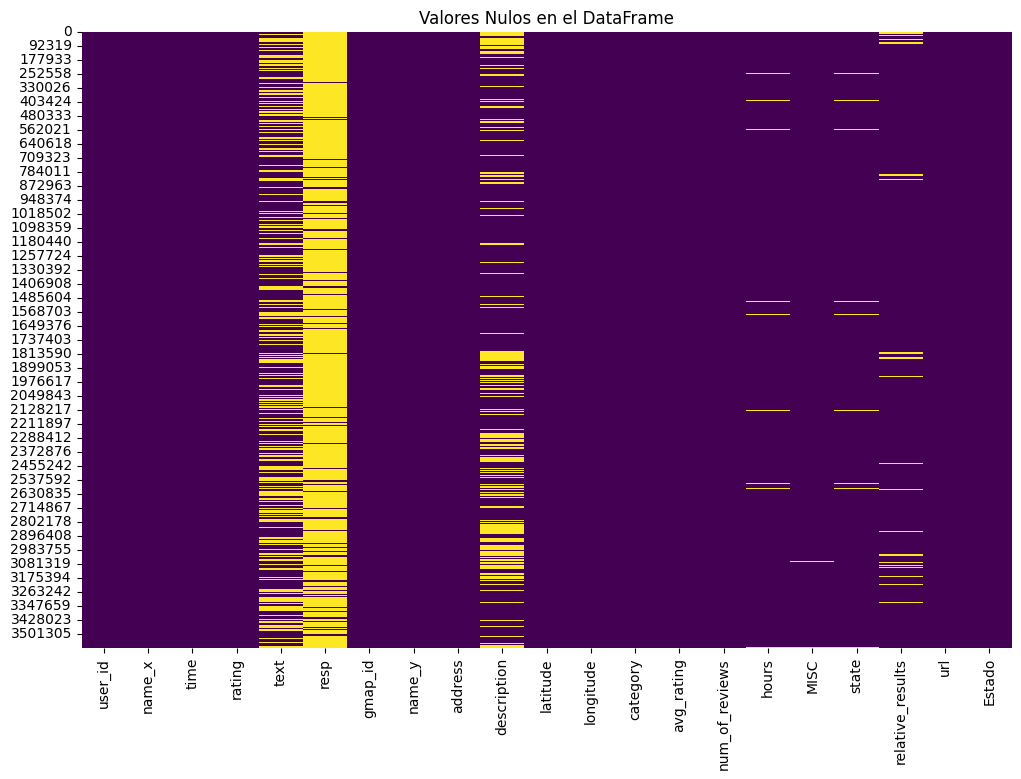

In [13]:
null_matrix = df.isnull()

plt.figure(figsize=(12, 8))
sns.heatmap(null_matrix, cmap='viridis', cbar=False)
plt.title('Valores Nulos en el DataFrame')
plt.show()

Trabjamos con las diferentes categorias de Restaurantes

Armamos un TOP 10 de estilos de restaurantes con mayor cantidad de reseñas en el DF

               Category   Count
0  Fast food restaurant  409740
1    Mexican restaurant  260943
2      Pizza restaurant  232897
3   American restaurant  207553
4    Seafood restaurant  130452
5    Chinese restaurant  124369
6    Italian restaurant  121452
7  Hamburger restaurant  102943
8    Chicken restaurant   60466
9     Buffet restaurant   47489


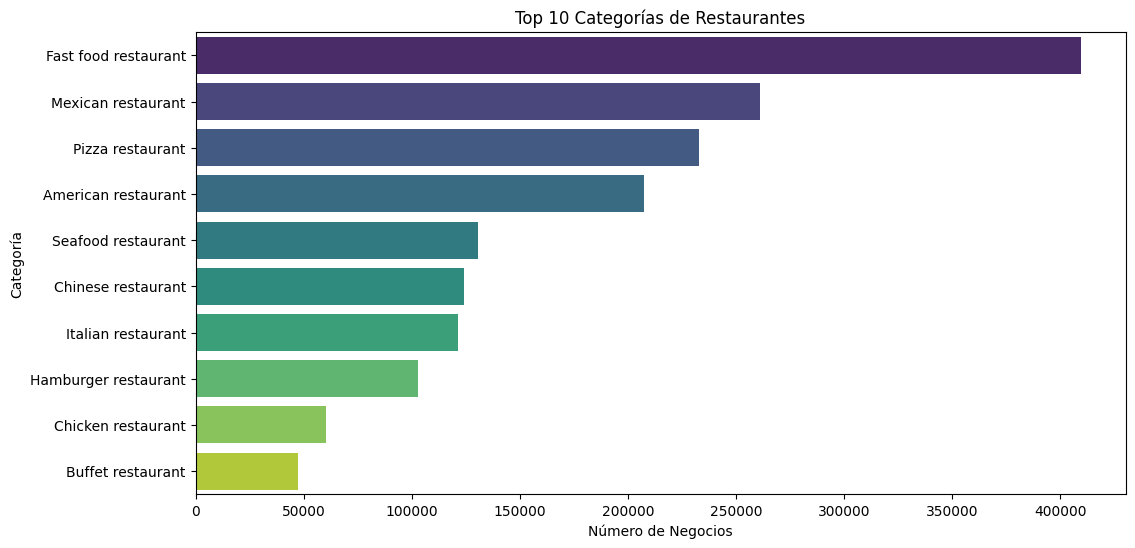

In [14]:
restaurant_df = df[df['category'].str.contains('Restaurant', case=False, na=False)]

restaurant_counts = restaurant_df['category'].value_counts().reset_index()
restaurant_counts.columns = ['Category', 'Count']

top_categories = restaurant_counts.head(10)
top_categories_df = pd.DataFrame(top_categories)

print(top_categories_df)

plt.figure(figsize=(12, 6))

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.barplot(x='Count', y='Category', data=top_categories, palette='viridis')

plt.title('Top 10 Categorías de Restaurantes')
plt.xlabel('Número de Negocios')
plt.ylabel('Categoría')
plt.show()

Creamos un histograma con la distribucion de calificaciones de las reseñas y la densidad de probabilidad

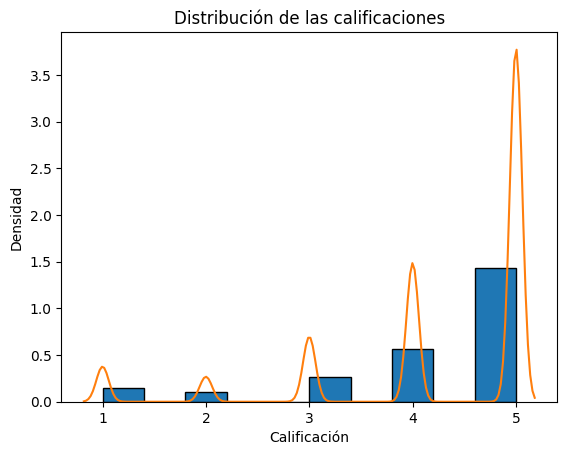

In [15]:
restaurant_df.loc[:, 'rating'] = pd.to_numeric(restaurant_df['rating'], errors='coerce')

plt.hist(restaurant_df['rating'], bins=10, edgecolor='black', density=True)

sns.kdeplot(restaurant_df['rating'])

plt.title('Distribución de las calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Densidad')

plt.show()

Creamos un grafico de barras horizontales con los 10 locales con mayor cantidad de reseñas menor a 2 estrellas

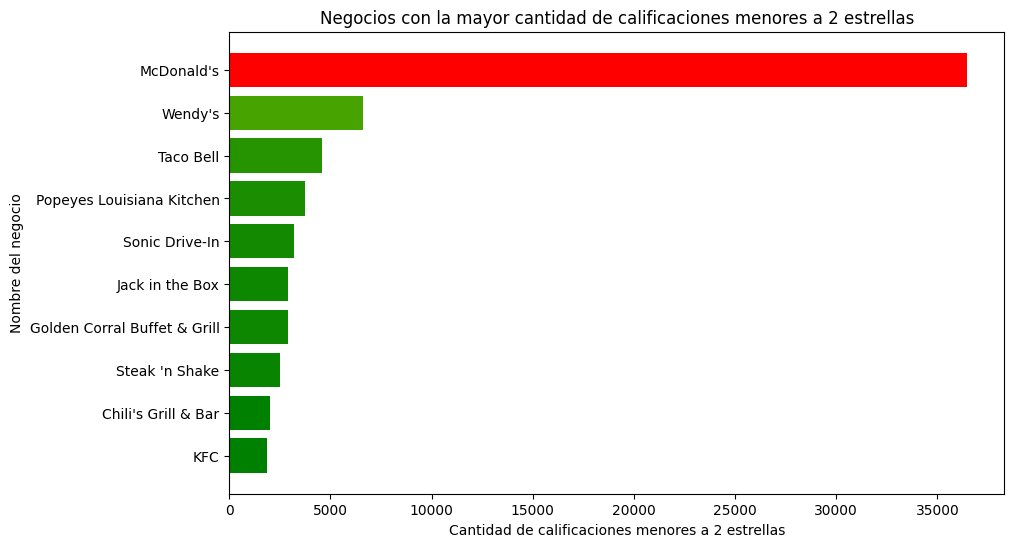

In [16]:
negocios = restaurant_df[restaurant_df['rating'] <= 2]

negocios_peor_calificados = negocios['name_y'].value_counts().head(10)


plt.figure(figsize=(10, 6))

cmap = mcolors.LinearSegmentedColormap.from_list("", ["green", "yellow", "red"])

norm = plt.Normalize(negocios_peor_calificados.values.min(), negocios_peor_calificados.values.max())

plt.barh(negocios_peor_calificados.index, negocios_peor_calificados.values, color=cmap(norm(negocios_peor_calificados.values)))

plt.title('Negocios con la mayor cantidad de calificaciones menores a 2 estrellas')
plt.xlabel('Cantidad de calificaciones menores a 2 estrellas')
plt.ylabel('Nombre del negocio')

plt.gca().invert_yaxis()

plt.show()

Ahora creamos un grafico de barras horizontales con los 10 locales con mayor cantidad de reseñas mayores a 4 estrellas

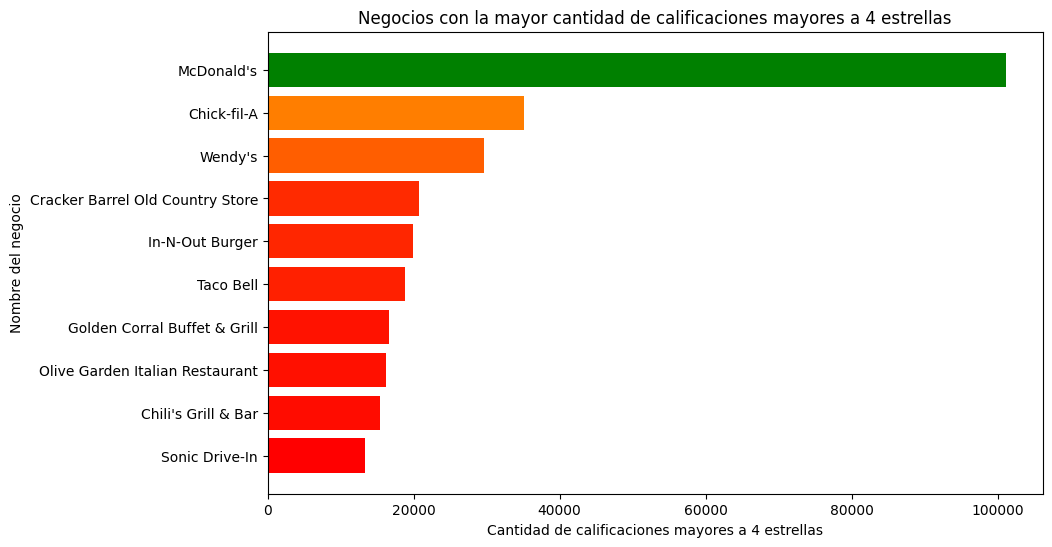

In [17]:

negocios_mas_4_estrellas = restaurant_df[restaurant_df['rating'] >= 4]

negocios_4_estrella_mas_frecuentes = negocios_mas_4_estrellas['name_y'].value_counts().head(10)

plt.figure(figsize=(10, 6))

cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

norm = plt.Normalize(negocios_4_estrella_mas_frecuentes.values.min(), negocios_4_estrella_mas_frecuentes.values.max())

plt.barh(negocios_4_estrella_mas_frecuentes.index, negocios_4_estrella_mas_frecuentes.values, color=cmap(norm(negocios_4_estrella_mas_frecuentes.values)))

plt.title('Negocios con la mayor cantidad de calificaciones mayores a 4 estrellas')
plt.xlabel('Cantidad de calificaciones mayores a 4 estrellas')
plt.ylabel('Nombre del negocio')

plt.gca().invert_yaxis()

plt.show()

Descartamos los datos que no corresponden a ningun estado y creamos un grafico circular con el porcentaje de reseñas en los 5 estados mas grandes de EEUU

In [18]:
restaurant_df = restaurant_df.loc[restaurant_df['Estado'] != 'Otro']

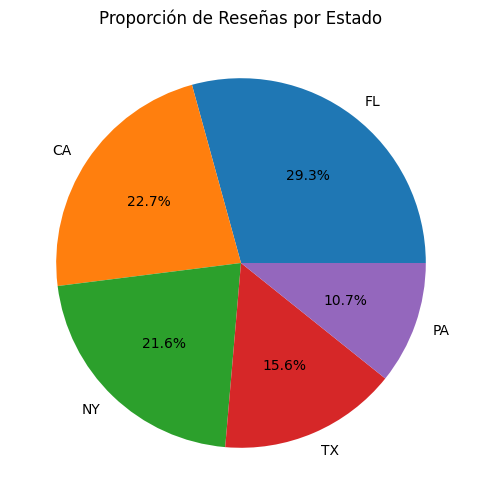

In [20]:
conteo_estados = restaurant_df['Estado'].value_counts()


plt.figure(figsize=(10,6))
plt.pie(conteo_estados.values, labels=conteo_estados.index, autopct='%1.1f%%')
plt.title('Proporción de Reseñas por Estado')
plt.show()

Creamos un Heat Map para correlacion entre variables con las columnas rating, avg_rating y num_of_reviews

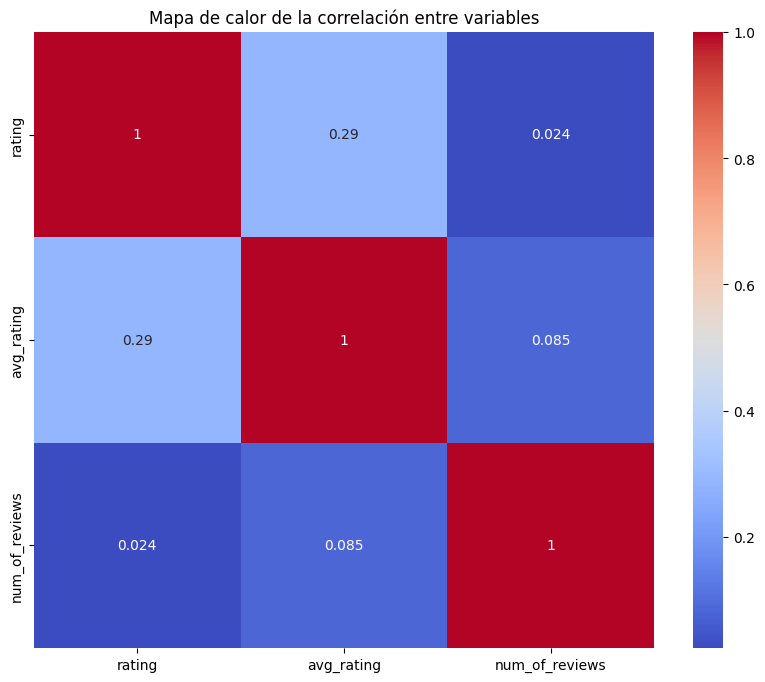

In [21]:
restaurant_df_selected = restaurant_df[['rating', 'avg_rating', 'num_of_reviews']]

correlation = restaurant_df_selected.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

plt.title('Mapa de calor de la correlación entre variables')
plt.show()

Trabajamos con los datos de Hoteles

Veriicamos las Categorias de Hoteles

In [22]:
hotel_df = df[df['category'].str.contains('Hotel', case=False, na=False)]

hotel_counts = hotel_df['category'].value_counts().reset_index()
hotel_counts.columns = ['Category', 'Count']
hotel_counts


,Category,Count
0,Resort hotel,1837
1,Extended stay hotel,416


Creamos un grafico de barras horizontales con los 10 locales con mayor cantidad de reseñas menor a 2 estrellas

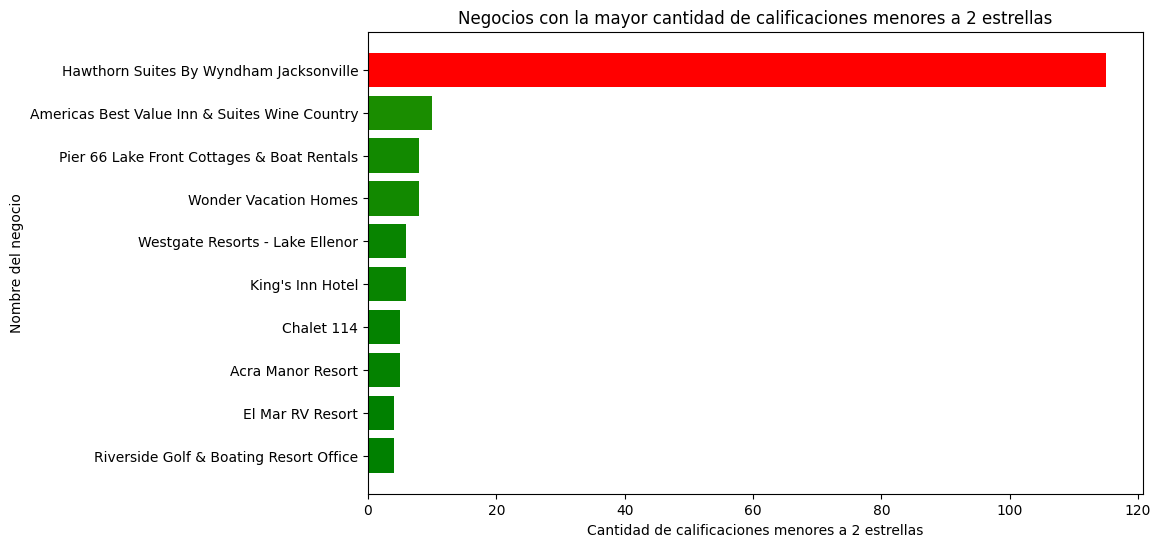

In [23]:
negocios = hotel_df[hotel_df['rating'] <= 2]

negocios_peor_calificados = negocios['name_y'].value_counts().head(10)


plt.figure(figsize=(10, 6))

cmap = mcolors.LinearSegmentedColormap.from_list("", ["green", "yellow", "red"])

norm = plt.Normalize(negocios_peor_calificados.values.min(), negocios_peor_calificados.values.max())

plt.barh(negocios_peor_calificados.index, negocios_peor_calificados.values, color=cmap(norm(negocios_peor_calificados.values)))

plt.title('Negocios con la mayor cantidad de calificaciones menores a 2 estrellas')
plt.xlabel('Cantidad de calificaciones menores a 2 estrellas')
plt.ylabel('Nombre del negocio')

plt.gca().invert_yaxis()

plt.show()

Ahora creamos un grafico de barras horizontales con los 10 locales con mayor cantidad de reseñas mayores a 4 estrellas

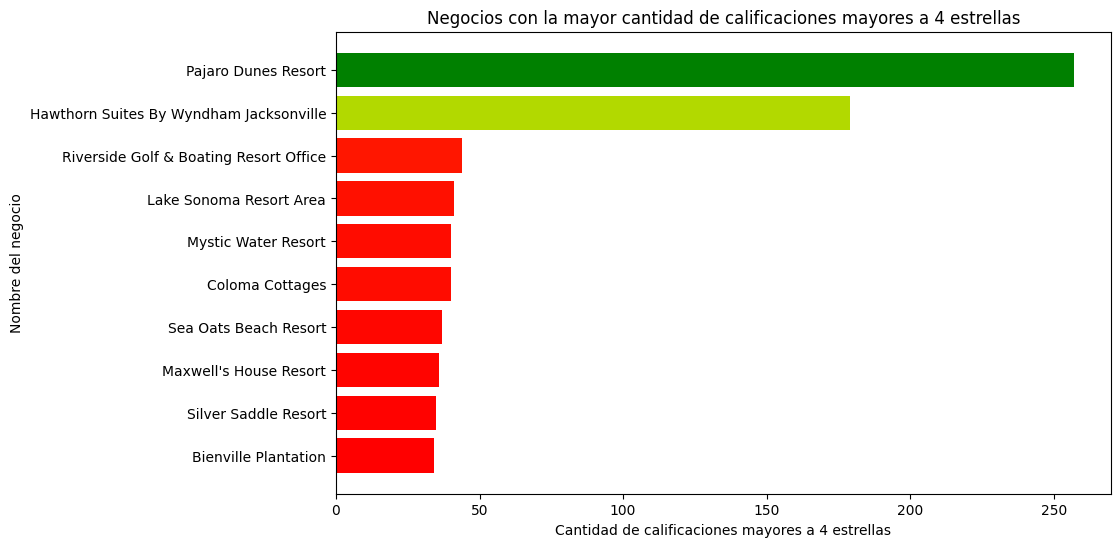

In [24]:
negocios_mas_4_estrellas = hotel_df[hotel_df['rating'] >= 4]

negocios_4_estrella_mas_frecuentes = negocios_mas_4_estrellas['name_y'].value_counts().head(10)

plt.figure(figsize=(10, 6))

cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

norm = plt.Normalize(negocios_4_estrella_mas_frecuentes.values.min(), negocios_4_estrella_mas_frecuentes.values.max())

plt.barh(negocios_4_estrella_mas_frecuentes.index, negocios_4_estrella_mas_frecuentes.values, color=cmap(norm(negocios_4_estrella_mas_frecuentes.values)))

plt.title('Negocios con la mayor cantidad de calificaciones mayores a 4 estrellas')
plt.xlabel('Cantidad de calificaciones mayores a 4 estrellas')
plt.ylabel('Nombre del negocio')

plt.gca().invert_yaxis()

plt.show()

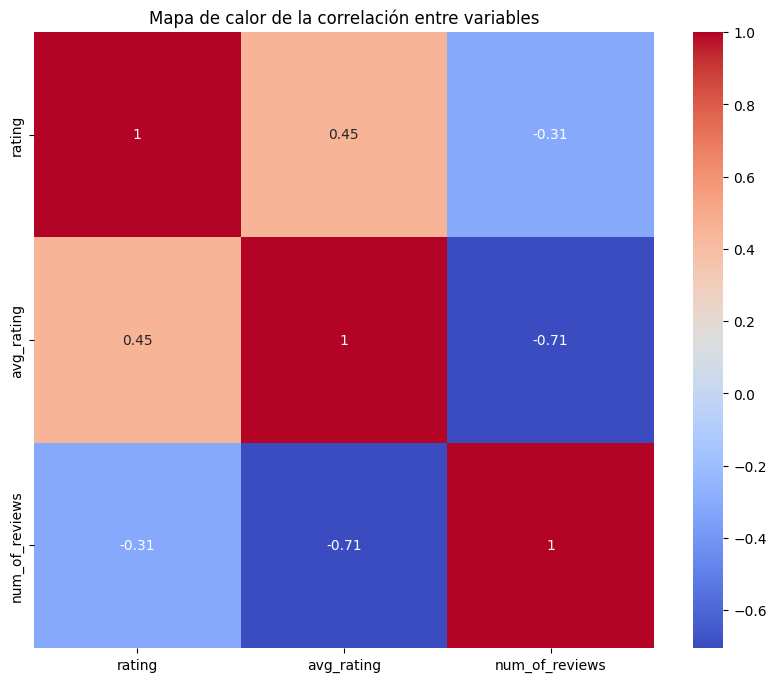

In [26]:
hotel_df_selected = hotel_df[['rating', 'avg_rating', 'num_of_reviews']]

correlation = hotel_df_selected.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

plt.title('Mapa de calor de la correlación entre variables')
plt.show()